# Life Expectancy Compared to Spending
This data analysis project explores life expectancies in 6 countries based on their spending.
By Jarred Gastreich

# Imports:

In [332]:
# Import from external packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets  # interactive widgets
import IPython  # used for display of widgets

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.
from matplotlib.axes import Axes

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Load and Explore Seaborn HealthExp.csv Dataset

In [333]:
# Load the penguins dataset from Seaborn
# Into a pandas DataFrame (table)
healthexp_df: pd.DataFrame = sns.load_dataset("healthexp")

# Show a few lines from the start of the dataset
healthexp_df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


# Initial Data Inspection

In [334]:
print(healthexp_df.head(10))
print(healthexp_df.shape)
print(healthexp_df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


# Initial Descriptive Statistics

In [335]:
print(healthexp_df.describe())


              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


Initial Data Distribution for Numerical Columns 

Life Expentancy and Spending Histogram


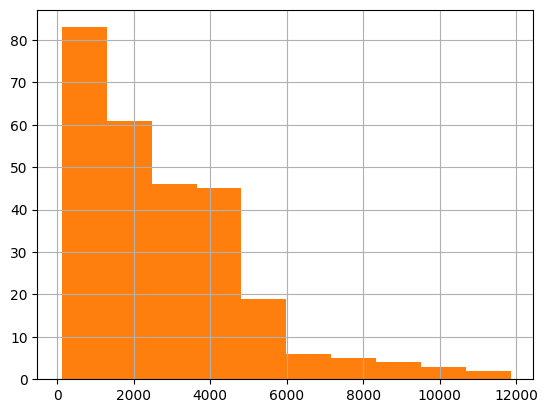

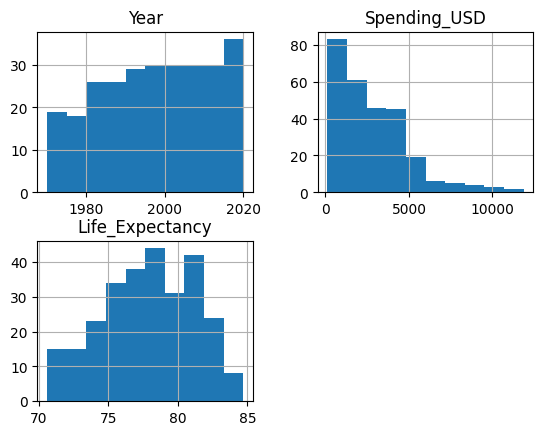

In [336]:
# Inspect histogram by numerical column
healthexp_df['Life_Expectancy'].hist()
healthexp_df['Spending_USD'].hist()
print("Life Expentancy and Spending Histogram")
# Inspect histograms for all numerical columns
healthexp_df.hist()

# Show all plots
matplotlib.pyplot.show()

## Initial Observations
The histogram clearly shows that the outlier is spending more than $6000.

Initial Data Distribution for Categorical Columns

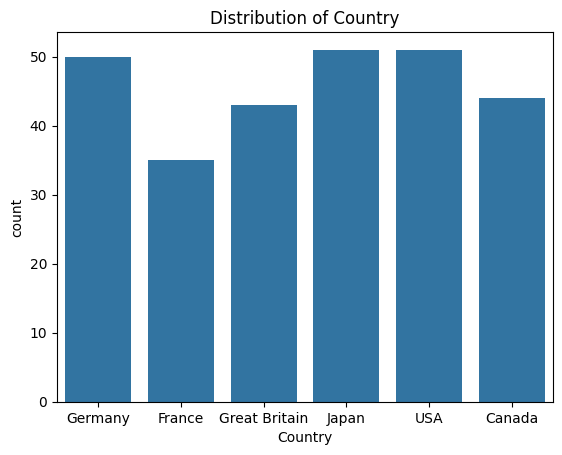

In [337]:
# Inspect value counts by categorical column
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
healthexp_df['Country'].value_counts()

# Inspect value counts for ALL categorical columns
for col in healthexp_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=healthexp_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

## Initial Observations
France may not have reported health data for a few years.

# Initial Data Transformation and Feature Engineering
One column is renamed, Life_Expectancy now becomes Life_Expectancy_Years to better represent the data.
One column is added, Spending_Per_Year_Of_Life is created by dividing Spending_USD by Life_Expectancy_Years.

In [338]:
# Feature Engineering
# Renaming a column
healthexp_df.rename(columns={'Life_Expectancy': 'Life_Expectancy_Years'}, inplace=True)

# Adding a new column
healthexp_df['Spending_Per_Year_Of_Life'] = healthexp_df['Spending_USD'] / healthexp_df['Life_Expectancy_Years']
healthexp_df[['Spending_USD', 'Life_Expectancy_Years', 'Spending_Per_Year_Of_Life']].head()
# Inspect histogram of new column


,Spending_USD,Life_Expectancy_Years,Spending_Per_Year_Of_Life
0,252.311,70.6,3.573810
1,192.143,72.2,2.661260
2,123.993,71.9,1.724520
3,150.437,72.0,2.089403
4,326.961,70.9,4.611580


# Initial Visualizations



## Scatter Plot
Goal: The goal if the scatter plot is to visualize the data without filtering.
Chart Type: A scatter plot will be used to allow the visualization to represent all columns. It may be messy, but that's okay for now.

Text(0.5, 1.0, 'Chart 1. Health Expectancy vs Spending per Capita')

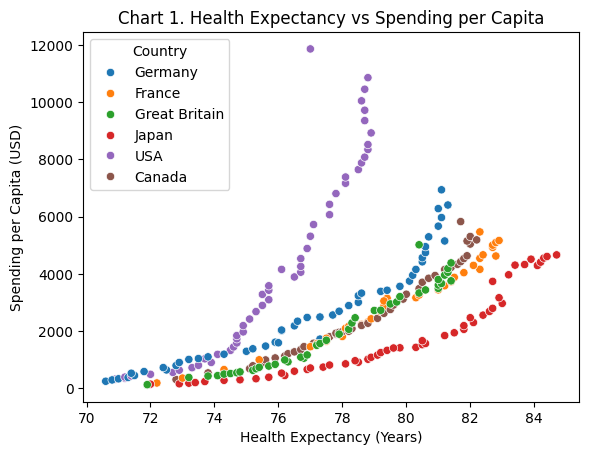

In [339]:
# Create a scatter plot of country spending vs life expectancy per country
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=healthexp_df, y="Spending_USD", x="Life_Expectancy_Years", hue="Country"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_ylabel("Spending per Capita (USD)")
scatter_plt.set_xlabel("Health Expectancy (Years)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Health Expectancy vs Spending per Capita")

# Run this cell by clicking the play button (Execute cell and below) in the cell toolbar
# Or by pressing Shift+Enter
# or by clicking Run All in the Menu above

## Scatter Plot Story
The scatter plot shows USA as an outlier as both a country who spends the most and has less life expectancy. 

The issue with the scatter plot is that it does not represent the "Year" column accurately. It can be assumed the years are represented linearly because spending and life expectancy is *expected* to increase each year. But we will need to alter the graph or use another graph to more accuratly illustrate this.

# Line Graph Representing Spending Per Year of Life
Each country's spending is represented as the amount spent per year of life.

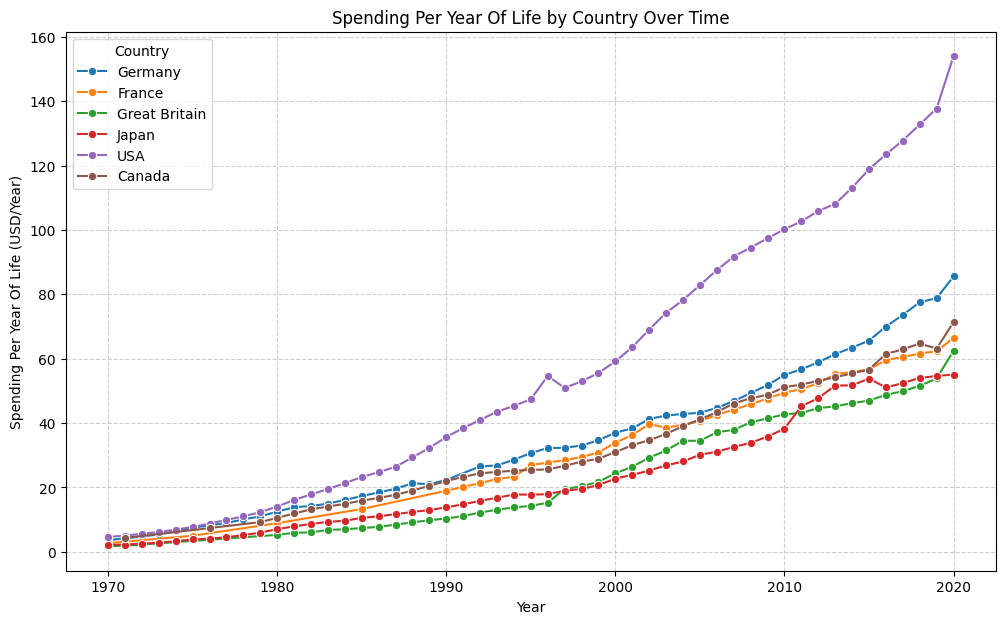

In [340]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=healthexp_df, x='Year', y='Spending_Per_Year_Of_Life', hue='Country', marker='o')
plt.title('Spending Per Year Of Life by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Spending Per Year Of Life (USD/Year)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country')
plt.show()

## Line Graph Story
The line graph uses the new column Spending_Per_Year_of_Life to simplify/combine the Spending_USD and Life_Expectancy variables so it is easier to illustrate that USA is an outlier in spending and the other countries are more homogenous. 

# Line Graph to Show Spending & Life Expectancy Trend Over Time for USA

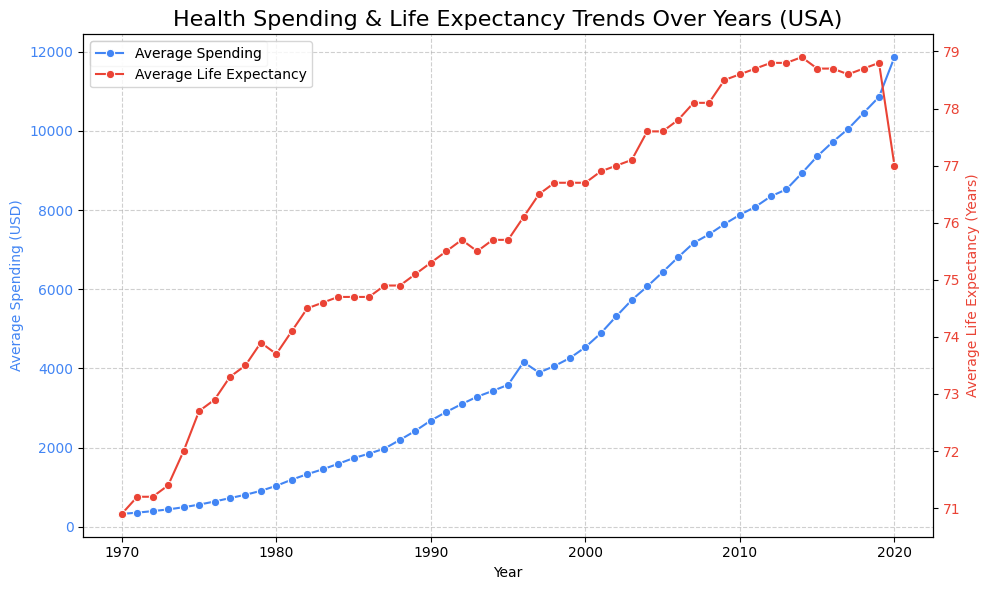

In [341]:
# --- Filter data for 'USA' only ---
healthexp_df_usa = healthexp_df[healthexp_df['Country'] == 'USA']

# --- Data Transformation ---
# Calculate average spending and life expectancy per year for USA
processed_trend_data = healthexp_df_usa.groupby('Year').agg(
    Average_Spending_USD=('Spending_USD', 'mean'),
    Average_Life_Expectancy_Years=('Life_Expectancy_Years', 'mean')
).reset_index()

# Sort by year to ensure correct line plotting
processed_trend_data = processed_trend_data.sort_values(by='Year')

# --- Plotting with Matplotlib and Seaborn ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Spending on the left Y-axis
color_spending = '#4285F4' # Google Blue
sns.lineplot(x='Year', y='Average_Spending_USD', data=processed_trend_data, ax=ax1, color=color_spending, marker='o', label='Average Spending')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Spending (USD)', color=color_spending)
ax1.tick_params(axis='y', labelcolor=color_spending)
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second Y-axis (twinx) for Life Expectancy
ax2 = ax1.twinx()
color_life_exp = '#EA4335' # Google Red
sns.lineplot(x='Year', y='Average_Life_Expectancy_Years', data=processed_trend_data, ax=ax2, color=color_life_exp, marker='o', label='Average Life Expectancy')
ax2.set_ylabel('Average Life Expectancy (Years)', color=color_life_exp)
ax2.tick_params(axis='y', labelcolor=color_life_exp)

# Title of the chart
plt.title('Health Spending & Life Expectancy Trends Over Years (USA)', fontsize=16)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## USA-Only Line Graph Story
This line graph benefits USA because it shows that as their life expectancy increased as they spent more money (excluding the pandemic). This graph is useful because it shows how someone can manipulate the data unethically if they isolated USA from the other countries.

# Display USA and Japan Side by Side in a Line Graph
Same graph showing Spending and Health Expectancy Trend Over Time, but this time comparing USA and Japan.

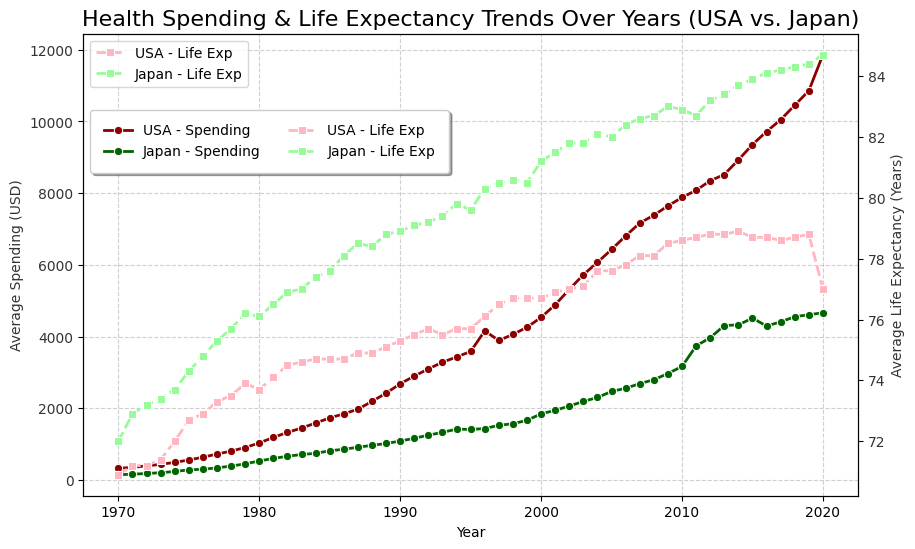

In [342]:
# --- Filter data for 'USA' and 'Japan' only ---
healthexp_df_filtered = healthexp_df[healthexp_df['Country'].isin(['USA', 'Japan'])]

# --- Data Transformation ---
# Calculate average spending and life expectancy per year for each filtered country
processed_trend_data = healthexp_df_filtered.groupby(['Country', 'Year']).agg(
    Average_Spending_USD=('Spending_USD', 'mean'),
    Average_Life_Expectancy_Years=('Life_Expectancy_Years', 'mean')
).reset_index()

# Sort by country then by year to ensure correct line plotting for each country
processed_trend_data = processed_trend_data.sort_values(by=['Country', 'Year'])

# --- Plotting with Matplotlib and Seaborn ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define specific color palettes for spending and life expectancy lines for clarity
# USA uses shades of red, Japan uses shades of green
# Darker shades for Spending, Lighter shades for Life Expectancy
color_usa_spending = '#8B0000' # Dark Red
color_usa_life_exp = '#FFB6C1' # Light Pink 

color_japan_spending = '#006400' # Dark Green
color_japan_life_exp = '#98FB98' # Pale Green 

# Filter data for each country for plotting
usa_data = processed_trend_data[processed_trend_data['Country'] == 'USA']
japan_data = processed_trend_data[processed_trend_data['Country'] == 'Japan']


# Plot USA Average Spending on the left Y-axis
sns.lineplot(
    x='Year',
    y='Average_Spending_USD',
    data=usa_data,
    ax=ax1,
    color=color_usa_spending,
    marker='o', # Circle markers for spending
    linestyle='-', # Solid line style for spending
    linewidth=2,
    label='USA - Spending' # Explicit label for legend
)

# Plot Japan Average Spending on the left Y-axis
sns.lineplot(
    x='Year',
    y='Average_Spending_USD',
    data=japan_data,
    ax=ax1,
    color=color_japan_spending,
    marker='o', # Circle markers for spending
    linestyle='-', # Solid line style for spending
    linewidth=2,
    label='Japan - Spending' # Explicit label for legend
)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Spending (USD)', color='#333') # Neutral color for axis label
ax1.tick_params(axis='y', labelcolor='#333')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second Y-axis (twinx) for Life Expectancy
ax2 = ax1.twinx()

# Plot USA Average Life Expectancy on the right Y-axis
sns.lineplot(
    x='Year',
    y='Average_Life_Expectancy_Years',
    data=usa_data,
    ax=ax2,
    color=color_usa_life_exp,
    marker='s', # Square markers for life expectancy
    linestyle='--', # Dashed line style for life expectancy
    linewidth=2,
    label='USA - Life Exp' # Explicit label for legend
)

# Plot Japan Average Life Expectancy on the right Y-axis
sns.lineplot(
    x='Year',
    y='Average_Life_Expectancy_Years',
    data=japan_data,
    ax=ax2,
    color=color_japan_life_exp,
    marker='s', # Square markers for life expectancy
    linestyle='--', # Dashed line style for life expectancy
    linewidth=2,
    label='Japan - Life Exp' # Explicit label for legend
)

ax2.set_ylabel('Average Life Expectancy (Years)', color='#333') # Neutral color for axis label
ax2.tick_params(axis='y', labelcolor='#333')

# Title of the chart
plt.title('Health Spending & Life Expectancy Trends Over Years (USA vs. Japan)', fontsize=16)

# Combine legends from both axes for a single, clear legend
# Get handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine all handles and labels
combined_handles = handles1 + handles2
combined_labels = labels1 + labels2

# Place the combined legend outside the plot area for better visibility
# Using a fixed position that is usually above the plot in Jupyter
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(0, 0.85), ncol=2, frameon=True, fancybox=True, shadow=True, borderpad=1)



plt.show()


## Comparison Graph Story
This graph clearly illustrates that by 2020 Japan has a much higher life expectancy and they spend much less than USA.

I believe this graph is the most ethical and useful because it puts the data in fair context. It shows only two countries so it's not too messy. It could also be benefitial to add another graph next to this one with all the other countries just to show that Japan isn't used unethically.